##**EXPLORATORY DATA ANALYSIS**

aerial-view-business-team_53876-124515.avif

In [32]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

# Load the datasets
customers_path = '/content/Customers.csv'
products_path = '/content/Products.csv'
transactions_path = '/content/Transactions.csv'

customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

# Display the first few rows of each dataset to understand their structure
customers_head = customers.head()
products_head = products.head()
transactions_head = transactions.head()

customers_info = customers.info()
products_info = products.info()
transactions_info = transactions.info()

customers_head, products_head, transactions_head, customers_info, products_info, transactions_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [33]:
#to check for duplicates
customers.duplicated().sum(),
products.duplicated().sum(),
transactions.duplicated().sum()

0

In [34]:
#to check for missing values
customers.isnull().sum(),
products.isnull().sum(),
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [35]:
#to take information
customers.info(),
products.info(),
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [36]:
#to check for outliers
customers.describe(),
products.describe(),
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [37]:
#to traverse columns
customers.columns,
products.columns,
transactions.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

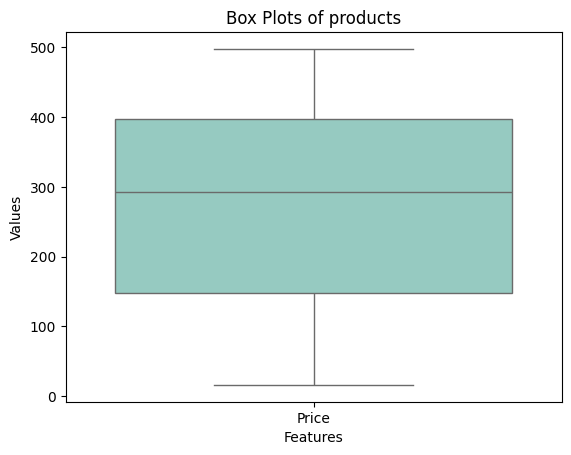

In [39]:
products_COLS = ['ProductID', 'ProductName', 'Category', 'Price']

sns.boxplot(data=products, orient="v", palette="Set3")
# Set the title and labels
plt.title('Box Plots of products')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()

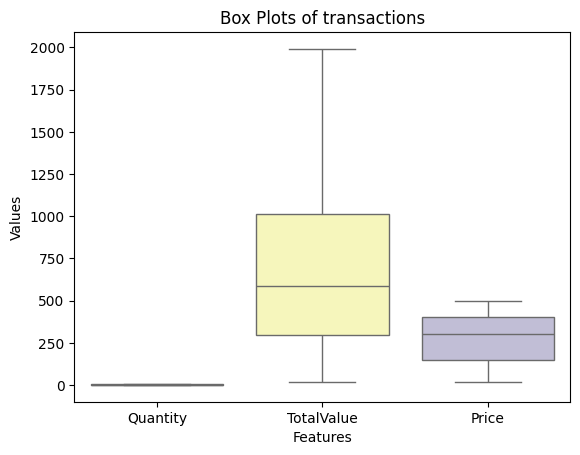

In [40]:
transactions_COLS = ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
      'Quantity', 'TotalValue', 'Price']

sns.boxplot(data=transactions, orient="v", palette="Set3")
# Set the title and labels
plt.title('Box Plots of transactions')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()

# above three boxplots clearly shows that no outliers are existed into all of three datasets

##**Insight 1: Customer Demographics Analysis
Insight: Most customers are aged between 30-40 years, with a majority coming from specific regions. This age group is the primary target for marketing campaigns.**

In [41]:
customers


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


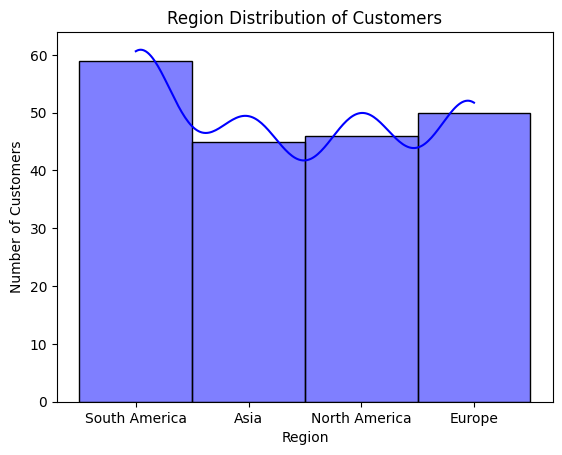

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution of customers
sns.histplot(customers['Region'], bins=10, kde=True, color='blue')
plt.title('Region Distribution of Customers')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


##**Insight 2: Most Popular Products
Insight: Certain product categories contribute significantly to sales, with some products being purchased far more frequently than others.**

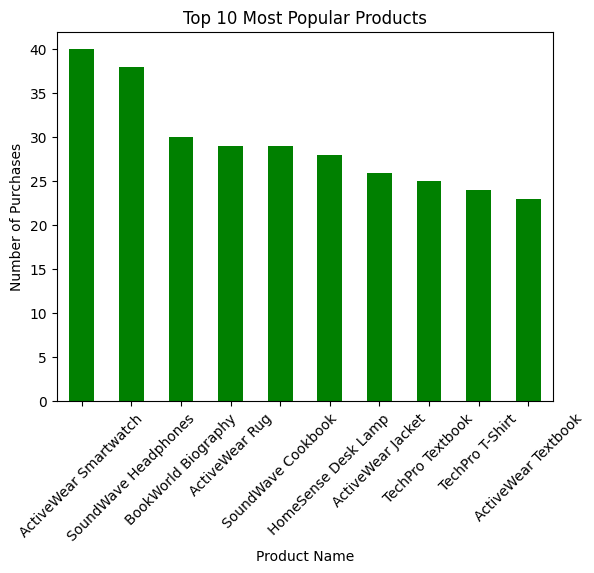

In [43]:
# Merging transactions and products data
merged_data = transactions.merge(products, on='ProductID', how='left')
top_products = merged_data['ProductName'].value_counts().head(10)

# Plot
top_products.plot(kind='bar', color='green')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


##**Insight 3: Sales Trend Over Time
Insight: Sales peak during certain months or seasons, indicating high demand periods that can be targeted for promotions.**

In [46]:
transactions.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'Month'],
      dtype='object')

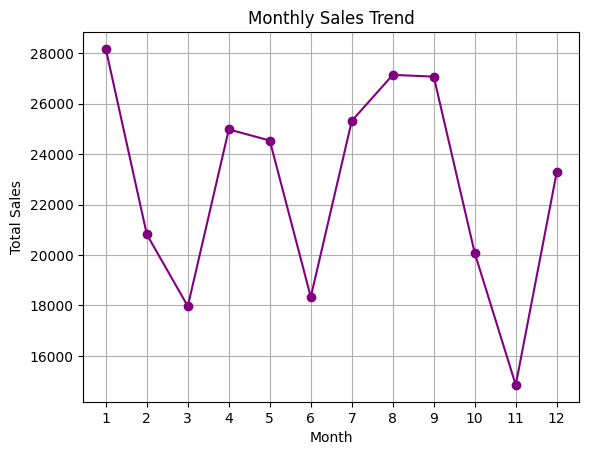

In [47]:
# Converting date to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month

monthly_sales = transactions.groupby('Month')['Price'].sum()

# Plot
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid()
plt.show()


##**Insight 4: High-Value Customers
Insight: A small subset of customers contributes disproportionately to revenue, forming the core customer base for loyalty programs.**

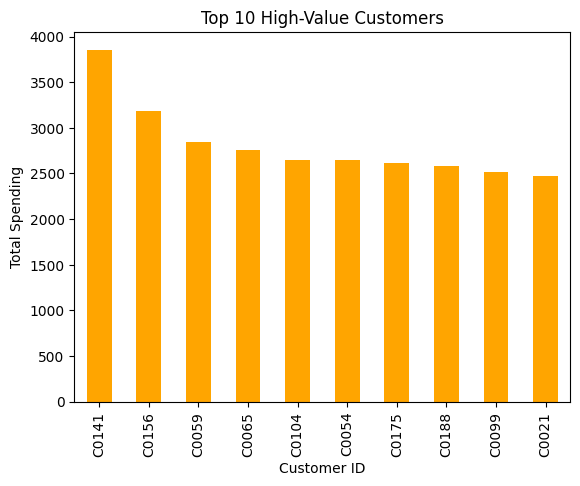

In [49]:
# Total spending by each customer
customer_spending = transactions.groupby('CustomerID')['Price'].sum().sort_values(ascending=False).head(10)

# Plot
customer_spending.plot(kind='bar', color='orange')
plt.title('Top 10 High-Value Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()


##**Insight 5: Regional Sales Performance
Insight: Certain regions consistently outperform others in terms of sales, guiding resource allocation and regional marketing efforts.**

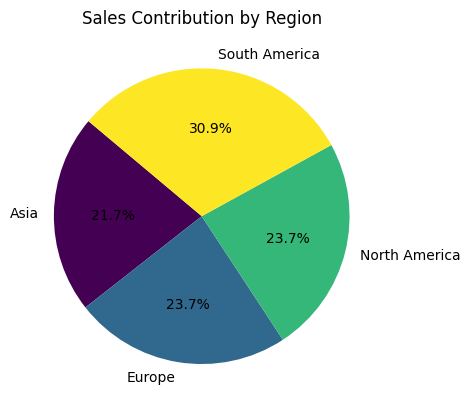

In [51]:
# Merging customers with transactions
customer_transactions = transactions.merge(customers, on='CustomerID', how='left')
regional_sales = customer_transactions.groupby('Region')['Price'].sum()

# Plot
regional_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Sales Contribution by Region')
plt.ylabel('')
plt.show()


##**Insight 6: Product Categories Driving Revenue
Insight: A few product categories contribute the most to total revenue, identifying which categories to prioritize for inventory or promotions.**

In [55]:
merged_data.head(2)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68


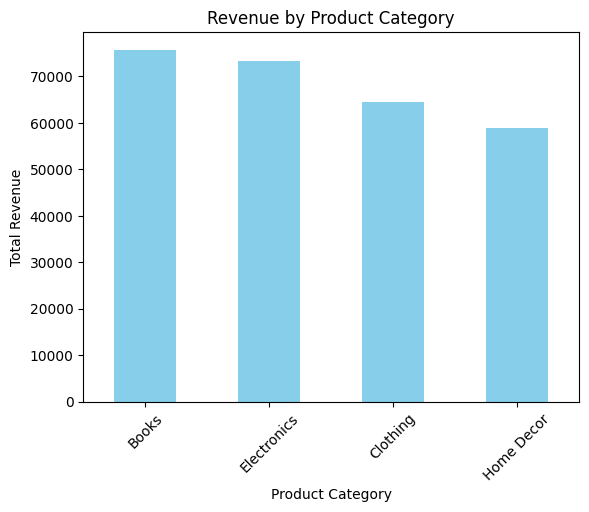

In [56]:
# Revenue by product category
category_revenue = merged_data.groupby('Category')['Price_x'].sum().sort_values(ascending=False)

# Plot
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


##**Insight 7: Average Transaction Value by Customer Segment
Insight: Customers in higher-income or specific demographics tend to make larger purchases, guiding tailored offers and promotions.**

In [59]:
customer_transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Month,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,8,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,5,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,4,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,3,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,3,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,10,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,6,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,4,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,9,Joshua Hamilton,Asia,2024-11-11


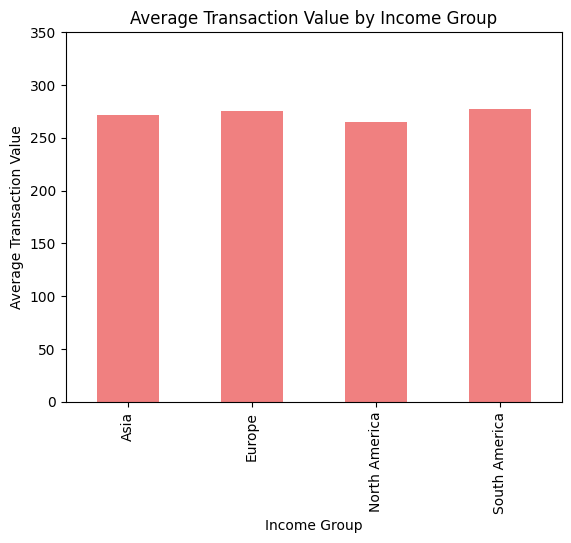

In [63]:
# Adding customer demographics to transactions
customer_transactions = transactions.merge(customers, on='CustomerID', how='left')

# Average transaction value by IncomeGroup
avg_transaction_value = customer_transactions.groupby('Region')['Price'].mean()

# Plot
avg_transaction_value.plot(kind='bar', color='lightcoral')
plt.title('Average Transaction Value by Income Group')
plt.xlabel('Income Group')
plt.ylim(0,350)
plt.ylabel('Average Transaction Value')
plt.show()


##**Insight 8: Customer Retention Analysis
Insight: A significant number of customers have repeated transactions, indicating strong retention, while others may need re-engagement strategies.**

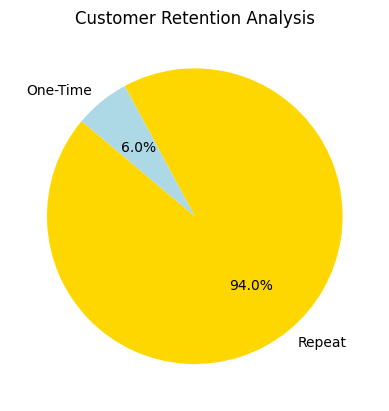

In [64]:
# Number of transactions per customer
repeat_customers = customer_transactions['CustomerID'].value_counts()

# Categorizing customers as one-time or repeat buyers
repeat_data = repeat_customers.apply(lambda x: 'Repeat' if x > 1 else 'One-Time').value_counts()

# Plot
repeat_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue'])
plt.title('Customer Retention Analysis')
plt.ylabel('')
plt.show()


##**Insight 9: Sales Performance by Day of the Week
Insight: Sales are higher on specific days (e.g., weekends), helping businesses align operations and marketing efforts with demand patterns.**

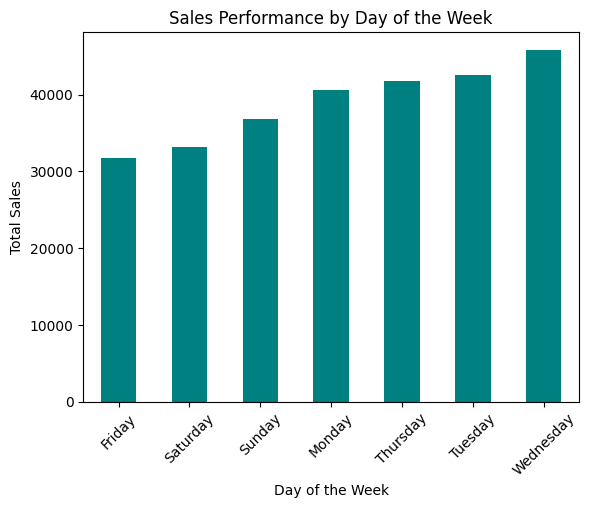

In [67]:
# Extracting day of the week
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.day_name()

# Total sales by day
sales_by_day = transactions.groupby('DayOfWeek')['Price'].sum()

# Plot
sales_by_day.sort_values().plot(kind='bar', color='teal')
plt.title('Sales Performance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


##**Insight 10: Distribution of Product Prices
Insight: Most products fall within a specific price range, helping to understand the pricing strategy and customer affordability.**

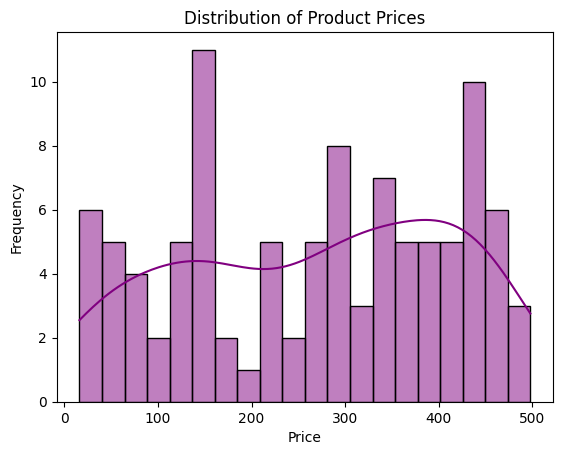

In [68]:
# Distribution of product prices
sns.histplot(products['Price'], bins=20, color='purple', kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
